In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/mislam/Desktop/Data/d14/xaa")
data.head(n = 20)

,1,1377986401,68.451,0,11,0.1,0.2
0,2,1.377986e+09,19.927,1.0,11.0,0.0,0.0
1,3,1.377986e+09,11.721,0.0,2.0,0.0,0.0
2,4,1.377986e+09,9.472,1.0,2.0,0.0,0.0
3,5,1.377986e+09,0.000,1.0,3.0,0.0,0.0
4,6,1.377986e+09,0.355,0.0,3.0,0.0,0.0
5,7,1.377986e+09,68.451,0.0,7.0,0.0,0.0
6,8,1.377986e+09,17.743,1.0,7.0,0.0,0.0
7,9,1.377986e+09,0.000,1.0,9.0,0.0,0.0
8,10,1.377986e+09,3.701,0.0,9.0,0.0,0.0
9,11,1.377986e+09,11.721,0.0,0.0,1.0,0.0


In [2]:
data['t'] = data['1377986401']
data['v'] = data['68.451']
data['hlid'] = data['0.1']
data['hid'] = data['0.2']
data['property'] = data['0']
data.drop('1', axis=1, inplace=True)
data.drop('1377986401', axis=1, inplace=True)
data.drop('68.451', axis=1, inplace=True)
data.drop('0', axis=1, inplace=True)
data.drop('11', axis=1, inplace=True)
data.drop('0.1', axis=1, inplace=True)
data.drop('0.2', axis=1, inplace=True)
data.head()

,t,v,hlid,hid,property
0,1.377986e+09,19.927,0.0,0.0,1.0
1,1.377986e+09,11.721,0.0,0.0,0.0
2,1.377986e+09,9.472,0.0,0.0,1.0
3,1.377986e+09,0.000,0.0,0.0,1.0
4,1.377986e+09,0.355,0.0,0.0,0.0


In [3]:
print(data.shape)
dt = data[(data['hlid'] == 1.0) & (data['property'] == 1.0)]
print(dt.shape)
da = dt.iloc[0:100000]
print(da.head())
print(da.iloc[0]['t'])
print(da.iloc[1]['t'])
print(da.iloc[5]['t'])
print(data['hid'].unique())

(122625137, 5)
(6660650, 5)
               t       v  hlid  hid  property
10  1.377986e+09  21.254   1.0  0.0       1.0
11  1.377986e+09   0.000   1.0  0.0       1.0
13  1.377986e+09   0.000   1.0  0.0       1.0
15  1.377986e+09   0.000   1.0  0.0       1.0
18  1.377986e+09  33.291   1.0  0.0       1.0
1377986401.0
1377986401.0
1377986401.0
[  0.   1.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.   2.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  29.   3.  30.  31.  32.  33.  34.  35.
  36.  37.  38.  39.   4.   5.   6.   7.   8.   9.  nan]


In [4]:
#ASAP
import sys
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import pandas as pd
import json
import numpy.fft
from decimal import Decimal
import math
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PAA
%matplotlib inline
# ASAP Simple (Brute Force)
def moving_average(data, _range):
    ret = np.cumsum(data, dtype=float)
    _range = int(_range)
    print(_range, "range")
    ret[_range:] = ret[_range:] - ret[:-_range]
    return ret[_range - 1:] / _range

def SMA(data, _range, slide):
    slide = int(slide)
    ret = moving_average(data, _range)[::slide]
    return list(ret)

def kurtosis(values):
    return scipy.stats.kurtosis(values)

def roughness(vals):
    return np.std(np.diff(vals))

def smooth_simple(data, max_window=5, resolution=None):
    data = np.array(data)
    # Preaggregate according to resolution
    window_size = 1
    slide_size = 1
    if resolution:
        slide_size = int(len(data) // resolution)
        if slide_size > 1:
            data = SMA(data, slide_size, slide_size)
    orig_kurt   = kurtosis(data)
    min_obj     = roughness(data)
    for w in range(2, len(data) // max_window + 1):
        smoothed = SMA(data, w, 1)
        if kurtosis(smoothed) >= orig_kurt:
            r = roughness(smoothed)
            if r < min_obj:
                min_obj = r
                window_size = w
    return window_size, slide_size
# ASAP
class Metrics(object):
    def __init__(self, values):
        self.set_values( values )

    def set_values(self, values):
        self.values = values
        self.r = self.k = None

    @property
    def kurtosis(self):
        if self.k is None:
            self.k = scipy.stats.kurtosis(self.values)
        return self.k

    @property
    def roughness(self):
        if self.r is None:
            self.r = np.std(np.diff(self.values))
        return self.r

class ACF(Metrics):
    CORR_THRESH = 0.2
    def __init__(self, values, max_lag=None):
        super(ACF, self).__init__(values)
        if max_lag is None:
            max_lag = len(values) / 5
        self.max_lag = int(max_lag)
        self.max_acf = 0.0

        # Calculate autocorrelation via FFT
        # Demean
        demeaned = values - np.mean(values)
        # Pad data to power of 2 
        l = int(2.0 ** (int(math.log(len(demeaned),2.0)) + 1))
        padded = np.append(demeaned, ([0.0] * (l - len(demeaned))))    
        # FFT and inverse FFT
        F_f = numpy.fft.fft( padded )
        R_t = numpy.fft.ifft( F_f * np.conjugate(F_f) )
        self.correlations = R_t[:int(max_lag)].real / R_t[0].real
        
        # Find autocorrelation peaks 
        self.peaks = []
        if len(self.correlations) >1 :
            positive = self.correlations[1] > self.correlations[0]
            max = 1
            for i in range(2, len(self.correlations)):
                if not positive and self.correlations[i] > self.correlations[i-1]:
                    max = i
                    positive = not positive
                elif positive and self.correlations[i] > self.correlations[max]:
                    max = i
                elif positive and self.correlations[i] < self.correlations[i-1]:
                    if max > 1 and self.correlations[max] > self.CORR_THRESH:
                        self.peaks.append(max)
                        if self.correlations[max] > self.max_acf:
                            self.max_acf = self.correlations[max]
                    positive = not positive
        # If there is no autocorrelation peak within the MAX_WINDOW boundary,
        # try windows from the largest to the smallest 
        if len(self.peaks) <= 1:
            self.peaks = range(2, len(self.correlations))
                    
def moving_average(data, _range):
    ret = np.cumsum(data)
    _range = int(_range)
    ret[_range:] = ret[_range:] - ret[:-_range]
    return ret[_range - 1:] / _range

def SMA(data, _range, slide):
    slide = int(slide)
    _range = int(_range)
    ret = moving_average(data, _range)[::slide]
    return list(ret)
                    
def binary_search(head,tail,data,min_obj,orig_kurt,window_size):
    while head <= tail:
        w = int(round((head + tail) / 2.0))
        smoothed = SMA(data,w,1)
        metrics  = Metrics(smoothed)
        if metrics.kurtosis >= orig_kurt:
            if metrics.roughness < min_obj:
                window_size = w
                min_obj = metrics.roughness
            head = w + 1
        else:
            tail = w - 1
    return window_size

def smooth_ASAP(data, max_window=5, resolution=None):
    data = np.array(data)
    # Preaggregate according to resolution
    slide_size = 1
    window_size = 1
    if resolution and len(data) >= 2 * resolution:
        slide_size = len(data) / resolution
        data = SMA(data, slide_size, slide_size)
    acf         = ACF(data, max_lag=len(data) / max_window)
    peaks       = acf.peaks
    orig_kurt   = acf.kurtosis
    min_obj     = acf.roughness
    lb          = 1
    largest_feasible = -1
    tail = len(data) / max_window
    for i in range(len(peaks) - 1, -1, -1):
        w = peaks[i]

        if w < lb or w == 1:
            break
        elif math.sqrt(1 - acf.correlations[w]) * window_size > math.sqrt(1 - acf.correlations[window_size]) * w:
            continue

        smoothed = SMA(data, w, 1)
        metrics = Metrics(smoothed)
        if metrics.roughness < min_obj and metrics.kurtosis >= orig_kurt:
            min_obj = metrics.roughness
            window_size = w
            lb = round( max(w*math.sqrt( (acf.max_acf -1) / (acf.correlations[w]-1) ), lb) )
    if largest_feasible > 0:
        if largest_feasible < len(peaks) - 2:
            tail = peaks[largest_feasible + 1]
        lb = max(lb, peaks[largest_feasible] + 1)

    window_size = binary_search(lb, tail, data, min_obj, orig_kurt, window_size)
    return window_size, slide_size

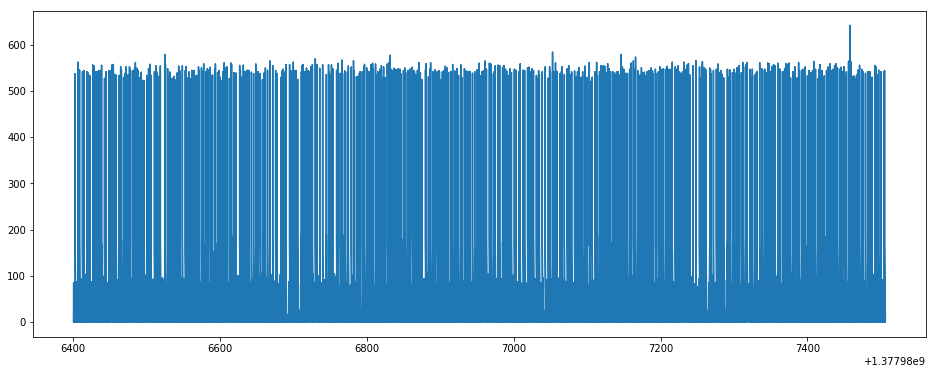

--- 0.4241321086883545 seconds ---


In [5]:
import matplotlib.pyplot as plt
import time
start = time.time()
X = np.array(da['t'])
Y = np.array(da['v'])
plt.figure(figsize=(16,6))
plt.plot(X,Y)
plt.savefig("d14/original.png")
plt.show()
end = time.time()

print("--- %s seconds ---" % (end - start))




--- 4.625136137008667 seconds ---
4425


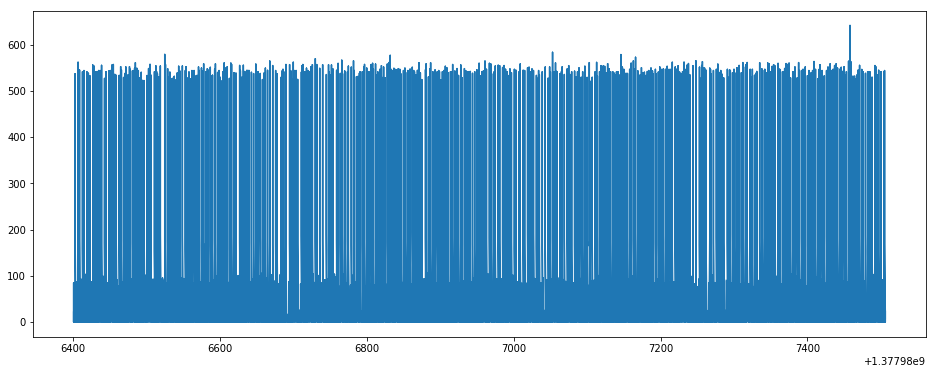

In [8]:
col = 'v'  
import collections
def window_sample(data,theta = 5):
    if(len(data) <=2):
        return data
    ret = []
    first = data.iloc[0]
    second = data.iloc[1]
    x1 = first["t"]
    x2 = second["t"]
    y1 = first[col]
    y2 = second[col]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)))
    current_angle = running_angle
    others = data.iloc[0:len(data)]
    ret.append(first)
    prev = first
    high = first
    low = second
    wins = {}
    for index, current in others.iterrows():
        t = current['t']
        if t not in wins:
            wins[t] =[]
        wins[t].append(current)
    od = collections.OrderedDict(sorted(wins.items()))
    for k in od:
        #print(k)
        w = od[k]
        maxv = w[0]
        minv = w[0]
        for a in w:
            if a['v'] > maxv['v']:
                maxv = a
            if a['v'] < minv['v']:
                minv = a
        ret.append(w[0])
        ret.append(minv)
        ret.append(maxv)
        ret.append(w[len(w)-1])
    return ret
start = time.time()
wsample = window_sample(da,6)
end = time.time()

print("--- %s seconds ---" % (end - start))

#(PASS)

print(len(wsample))
ws = {}
w = []
#for a in wsample:
#    if a["t"] not in ws:
#        w.append(a)
#        ws[a['t']] = True
    
len(w)

wframe = pd.DataFrame(wsample)
#er = get_error(wframe,random)
#print(er)
x = np.array(wframe['t'])
y = np.array(wframe['v'])
plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d14/winsample.png")
plt.show()

--- 0.8934447765350342 seconds ---
4545


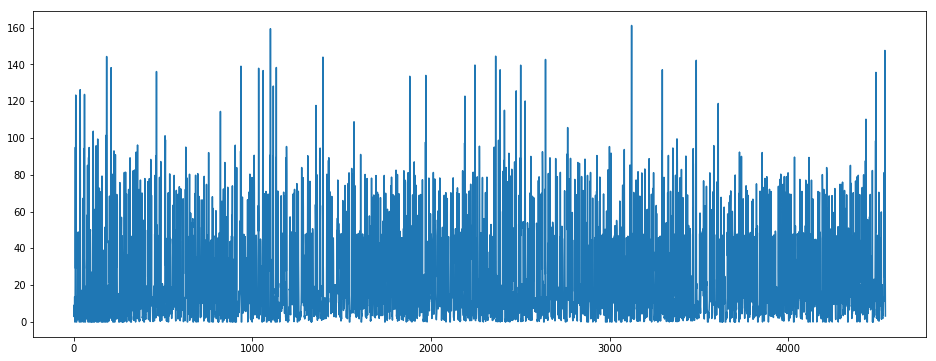

In [7]:
#ASAP
start = time.time()
mf3 = da["v"].tolist()
win_size, s_size = smooth_ASAP(mf3, resolution=4400)
#window_size, slide_size = smooth_simple(raw_data, resolution=1000)
dt = SMA(mf3, s_size, s_size)
smoothed = SMA(dt, win_size, 1)
smoothed_range = range(int(win_size/2), int(win_size/2) + len(smoothed))
end = time.time()

print("--- %s seconds ---" % (end - start))



plt.figure(figsize=(16,6))
plt.plot(smoothed_range,smoothed)
print(len(smoothed))

#plt.axis('off')
#plt.title("ASAP")
#plt.savefig('window_taxi.pdf')
#plt.axis('off')
plt.savefig("d14/asap.png")


plt.show()

4546
--- 0.033307790756225586 seconds ---


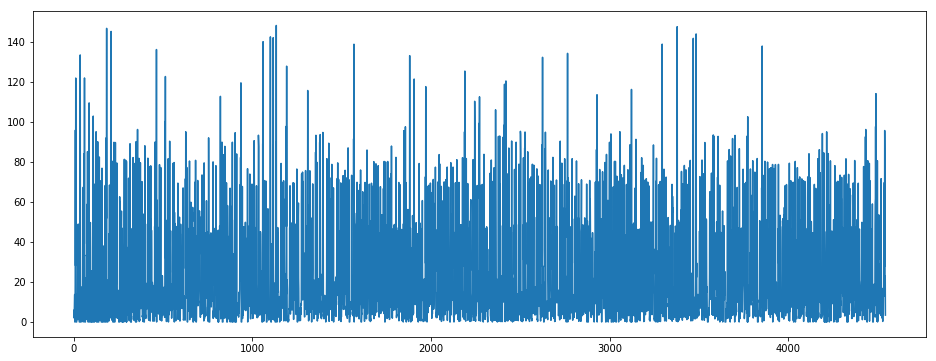

In [9]:
window_size = 22
start = time.time()
paa = PAA(window_size=window_size)
X_paa = paa.transform([da["v"]])
print(len(X_paa[0]))
plt.figure(figsize=(16,6))
plt.plot(X_paa[0])
end = time.time()

print("--- %s seconds ---" % (end - start))



plt.savefig("d14/paa.png")


plt.show()

--- 14.616641998291016 seconds ---
4840


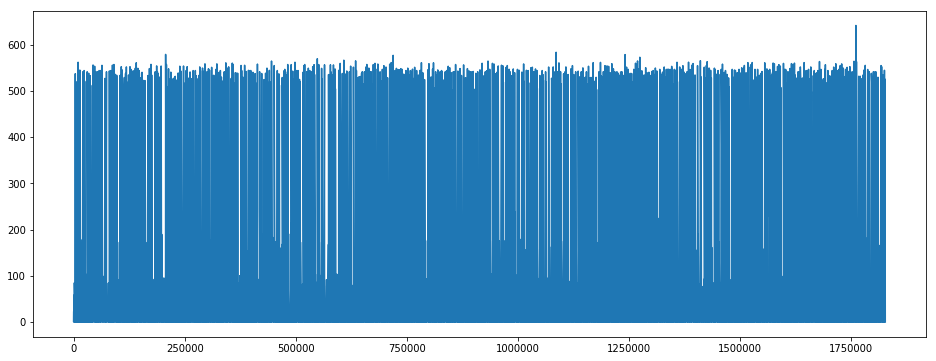

In [10]:
w = 1210
start = time.time()
def m4(data, w):
    wsize = data.shape[0]//w
    ret = []
    seen = {}
    for g in range(0,w):
        maxv = None
        minv = None
        first = None
        last = None
        indices = [0,0,0,0]
        for i in range(g*wsize, g*wsize + wsize):
            if minv is None:
                minv = data.iloc[i]
                indices[0] = i
            elif data.iloc[i]["v"] < minv["v"]:
                minv = data.iloc[i]
                indices[0] = i
            if maxv is None:
                maxv = data.iloc[i]
                indices[1] = i
            elif data.iloc[i].v > maxv.v:
                maxv = data.iloc[i]
                indices[1] = i
            if i == g*wsize:
                first = data.iloc[i]
                indices[2] = i
            if i == g*wsize + wsize - 1:
                last = data.iloc[i]
                indices[3] = i
        indices.sort()
        for j in range(0, len(indices)):
            if indices[j] in seen:
                continue
            seen[j] = True
            ret.append(data.iloc[indices[j]])
    df = pd.DataFrame(ret)
    #df = df.sort_values("timestamp")
    return df
ret = m4(da,w)
end = time.time()

print("--- %s seconds ---" % (end - start))



plt.figure(figsize=(16,6))
plt.plot(ret["v"])
print(len(ret["v"]))
fig = plt.gcf()
#plt.title("M4")
#plt.savefig('M4_taxi.pdf')
plt.savefig("d14/m4.png")


plt.show()




--- 14.501961946487427 seconds ---
4840


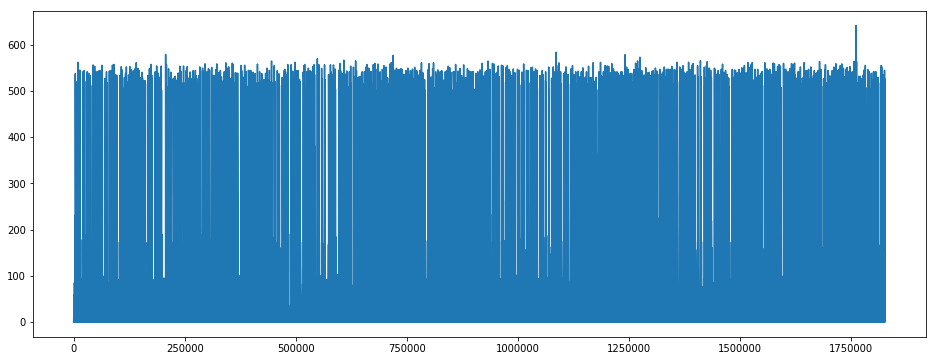

In [11]:
# MinMax
start = time.time()
def minmax(data, w):
    wsize = data.shape[0]//w
    ret = []
    seen = {}
    for g in range(0,w):
        maxv = None
        minv = None
        indices = [0,0]
        for i in range(g*wsize, g*wsize + wsize):
            if minv is None:
                minv = data.iloc[i]
                indices[0] = i
            elif data.iloc[i]["v"] < minv["v"]:
                minv = data.iloc[i]
                indices[0] = i
            if maxv is None:
                maxv = data.iloc[i]
                indices[1] = i
            elif data.iloc[i].v > maxv.v:
                maxv = data.iloc[i]
                indices[1] = i
        indices.sort()
        for j in range(0, len(indices)):
            if indices[j] in seen:
                continue
            seen[j] = True
            ret.append(data.iloc[indices[j]])
    df = pd.DataFrame(ret)
    #df = df.sort_values("timestamp")
    return df

ret = minmax(da,2*w)

#M4
end = time.time()

print("--- %s seconds ---" % (end - start))



plt.figure(figsize=(16,6))
plt.plot(ret["v"])
print(len(ret["v"]))
fig = plt.gcf()
#plt.savefig('M4_taxi.pdf')
plt.savefig("d14/minmax.png")


plt.show()

4178
--- 55.53460764884949 seconds ---
              0       1
0  1.377986e+09  21.254
1  1.377986e+09  84.763
2  1.377986e+09   0.000
3  1.377986e+09  72.487
4  1.377986e+09   0.000


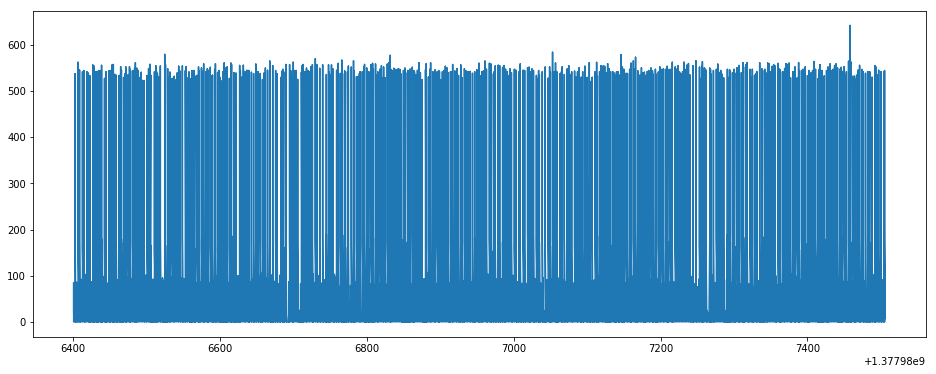

In [12]:
from rdp import rdp
D = []
start = time.time()
X = da["t"]
Y = da["v"]

for x,y in zip(X,Y):
    D.append([x,y])
dp = rdp(D,epsilon = 1)
print(len(dp))
dframe = pd.DataFrame(dp)
end = time.time()

print("--- %s seconds ---" % (end - start))



print(dframe.head())
x = np.array(dframe[0])
y = np.array(dframe[1])
plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d14/rdp.png")


plt.show()

5164
--- 4.3840858936309814 seconds ---


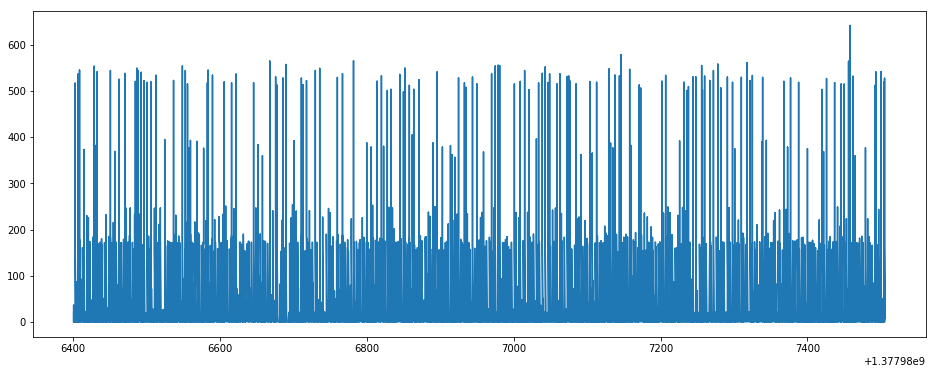

In [13]:
import visvalingamwyatt as vw
D = []
start = time.time()
X = da["t"]
Y = da["v"]
for x,y in zip(X,Y):
    D.append([x,y])
simplifier = vw.Simplifier(D)
vwd = simplifier.simplify(ratio = .05)

print(len(vwd))
dframe = pd.DataFrame(vwd)
x = np.array(dframe[0])
y = np.array(dframe[1])
end = time.time()

print("--- %s seconds ---" % (end - start))



plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d14/vwd.png")


plt.show()

5000
                 t    v  hlid   hid  property
1915  1.377986e+09  0.0   1.0  38.0       1.0
1977  1.377986e+09  0.0   1.0  39.0       1.0
1780  1.377986e+09  0.0   1.0  36.0       1.0
567   1.377986e+09  0.0   1.0  18.0       1.0
1219  1.377986e+09  0.0   1.0  28.0       1.0


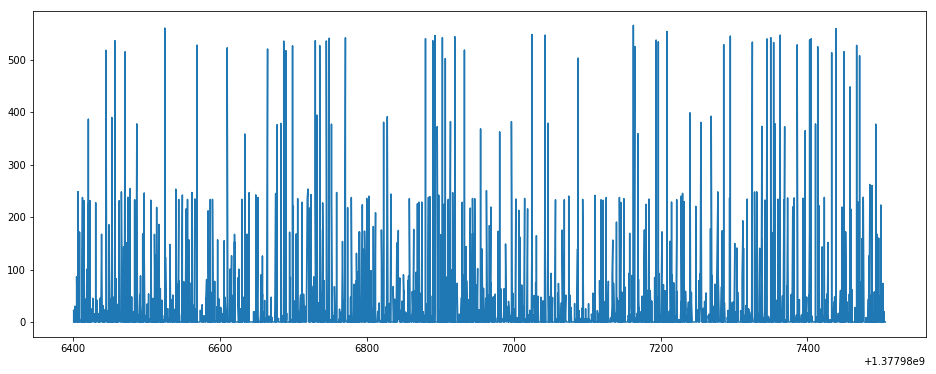

--- 0.17319083213806152 seconds ---


In [15]:
# Random
start = time.time()
ran = da.sample(frac=0.05, replace=True)
ran = ran.sort_values(["t"])
print(len(ran))
x = np.array(ran["t"])
y = np.array(ran["v"])
print(ran.head())
plt.figure(figsize=(16,6))
plt.plot(x,y)
# plt.title("Random sampling")
plt.savefig("d14/random.png")

plt.show()
end = time.time()

print("--- %s seconds ---" % (end - start))



<class 'pandas.core.frame.DataFrame'>
(5000, 5)


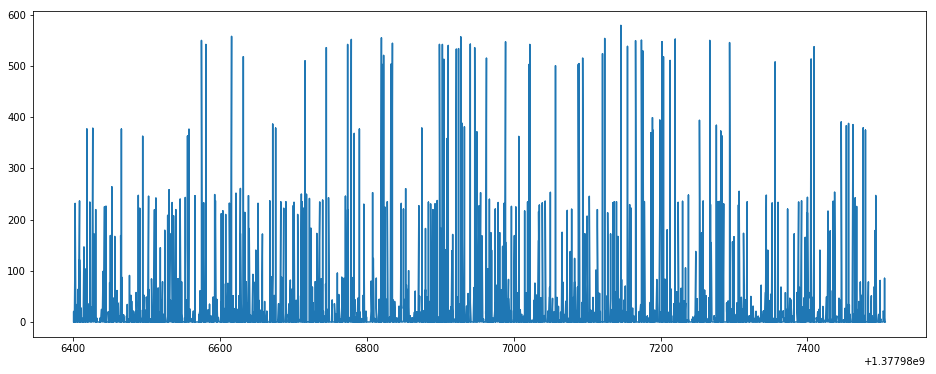

--- 0.1910867691040039 seconds ---


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
start = time.time()


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.95, random_state=0)

T = [0]*da.shape[0]
traini= sss.split(da,T)
D = pd.DataFrame()
for t,i in traini:
    print(type(da.iloc[t]))
    D = da.iloc[t]
#print(D)
print(D.shape)
D = D.sort_values(["t"])

x = np.array(D["t"])
y = np.array(D["v"])
plt.figure(figsize=(16,6))
plt.plot(x,y)
plt.savefig("d14/stratified.png")
plt.show()
end = time.time()

print("--- %s seconds ---" % (end - start))

